# The Titanic Survivor llist prediction Project

## Project Description

The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.

In the early hours of April 15, 1912, the British passenger liner Titanic perished in the North Atlantic Ocean after colliding with an iceberg on its inaugural journey from Southampton to New York City. The ship carried an estimated 2,224 passengers and crew members, making it one of the biggest commercial peacetime maritime disasters in modern history with almost 1,500 fatalities. The second of three Olympic-class ocean liners run by the White Star Line, the RMS Titanic was the biggest ship in existence when it entered service. Belfast's Harland & Wolff shipyard constructed the Titanic. Her architect, Thomas Andrews, perished in the catastrophe.

### Let's Import majorly required Libraries and Later lets import based on requirements

In [129]:
import pandas as pd # For solving problems on linear algebra
import numpy as np # Import for data processing
import seaborn as sns # import seaborn for data visualization
#import matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [130]:
# Lets Import Data set using the link given in the survivors in titanic project description and read it to see number of Rows x Columns
titanic_df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [131]:
#Lets check head of the DataFrame retrieved using df.head()
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Several things can be observed from the table above. 

First of all, many features must first be converted into quantitative ones before being processed by machine learning algorithms. 

Furthermore, it is clear that the ranges of the features are extremely dissimilar, which we must translate into a scale that is relatively equivalent. 

We can also identify additional features that have missing values (NaN = not a number) that require our attention.

In [132]:
#Lets check tail of the DataFrame retrieved using df.head()
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


For the Model Building and finding issues with the data set at various locations and phases we need to do Exploratory Data Analysis (EDA). For that First, Let's start with Non-Graphical Analysis

# Exploratory Data Analysis (EDA)

## Non-Graphical Analysis

Since, we have collected the data from GitHub, and found that "Survived" is the target variable for us. and chosen that Classification is the problem. Let's go for finding out the details of all variables such as size, shape, information regarding NULL Values/Blank Space/White Spaces and clean them by using various methods

In [133]:
#Let's check the dimensions of the data set using shape 
titanic_df.shape

(891, 12)

From this we understand that the data set contains 891 Rows and 12 Columns of Information

In [134]:
#Let's check the names of the Columns for later usage
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Above you can see the 11 features + the target variable (survived). What features could contribute to a high survival rate ?

We can colclude that it would make sense if everything except ‘PassengerId’, ‘Ticket’ and ‘Name’ would be correlated with a high survival rate.

In [135]:
#checking the dimensions of the internet 
titanic_df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

With this we could convert the DataFrame Columns to the List and checked

In [136]:
#Let's check the data types of the columns
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

From this, we can understand that, Seven (7) coulmns are having Numerical Data and Five(5) Columns have Categorical data.
Among 7 Numerical Columns  Age and Fare contains Float type of Data and PassengerId, Survived, Pclass, SibSp and Parch Columns contains int64 type. Name, Sex, Ticket, Cabin and Embarked are of Object Data types. 
So, we need to do a lot of operations to check NULL values, replace them and also to convert categorical data into Numerical data for further analysis.

Below I am giving a brief information about the colmns

survival:    Survival 
PassengerId: Unique Id of a passenger. 
pclass:    Passeneger travelling in which class     
sex:    Sex - Male/Female
Age:    Age in years     
sibsp:    Number of siblings / spouses who aboard the Titanic     
parch:    Number of parents / children who aboard the Titanic     
ticket:    Ticket number consisting Alpha-numerical data
fare:    Passenger fare     
cabin:    Cabin number     
embarked:    Port of Embarkation

#### Checking the Null Values

In [137]:
#Checking the Null Values
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The above method is showing clearly that, the dataset contains many NULL Values, 
basically Age containing 177 Null Values and we need to deal with them.
Cabin containing largest NaN Values and also we need to fix them,
Embarked column consists of 2 NULL Values and which can be dealt easily

In [138]:
#Check the Sum of NULL Values in the total DataFrame
titanic_df.isnull().sum().sum()

866

We can now understand that, the total number of NULL Values we need to deal with are about 866. 
Lets find out the different options or methods to treat them properly

### Get the Complete Information about Dataset

In [139]:
#Fetching the information about the DataFrame with Non Null Values and Data Type of the Column
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We have already looked at the information and NULL values earlier and this is a simple way to reiterate and check the 
information clearly.

We can see that, there are 2 columns of the features are floats, 5 are integers and 5 are objects.
The dataset has 891 values and 11 features + the target variable (survived). Memory Size is about 83.7+ KB

##### Let's check the unique values and all the information in each column

In [140]:
#Gives Unique Values
titanic_df['Survived'].unique()

array([0, 1], dtype=int64)

It can be understood that there are only 2 unique types are there in SURVIVED Column. In the similiar way we can find the unique values under each column. But we can use Value_counts function with a FOR Loop to find all details together

In [141]:
#Gives Total Number of Unique Values in our target variable
titanic_df['Survived'].nunique()

2

In [142]:
#Checking the value counts of each Column
for i in titanic_df.columns:
    print(titanic_df[i].value_counts())
    print("\n")

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length

We can observe from this as,

1) the passenger IDs are unique for each passenger.

2) Under Survived we have two unique types, 342 members survived and 549 are not survived

3) Pclas gives information that 216 Passengers travelled in 1st Class, 184 in 2nd class and 491 travelled in 3rd class.

4) Name has all 891 Unique names since all the passengers list is represented here

5) Sex columns gives the information that, 577 Male and 314 Female passengers were travelled in The Titanic

6) Age column has 88 Unique values with smallest aged is 0.92 and highest is 74 years

7) SibSp column is giving information about number siblings/spouses and without sibling passengers were 608.

8) Parch feature gives, there were 678 passengers without any Parents/siblings onboard

9) There were multiple numbers with same ticket number and we need to identify later on

10) Fare depicitng the variuos ranges of passenger fares based on the class they were travelled

11) Similarly Cabin displays the cabin number of the passengers and we have 4 cabins with same name in some instnaces

12) From Embarked feature, we can observe that there were 3 different places where the passengers were boarded

<Axes: >

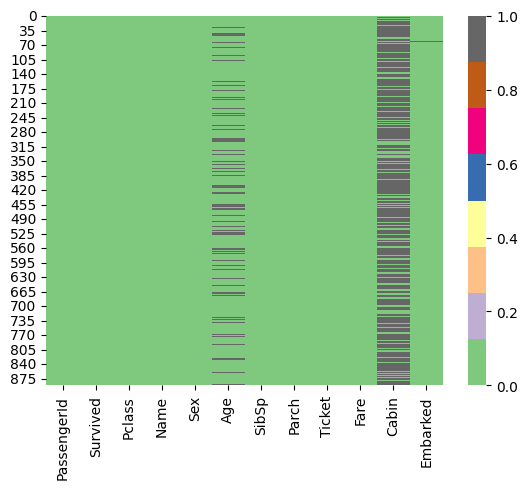

In [143]:
#Lets Visuliza using Heat Map to find out the presence of NULL Values
sns.heatmap(titanic_df.isnull(),cmap="Accent")

The above Heatmap is clearly showing the presence of NULL Values both in Age and Cabin columns. 
Since Cabin column has very large NULL Values, we can't treat them directly. Later we can drop the same.

In [144]:
#Let's implement describe to return the description of the data in the DataFrame
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


As seen above, 38% of the total dataset have survived off the Titanic. 

The passenger ages range from 0.4 to 80, as we can plainly see. Additionally, we can already identify several features with missing values, such as the 'Age' feature.

Since, the describe() method is used to return the description of the data in the given Dataset, we use it to find out the description of 
Numerical data which gives the final conclusion and information as follows in the each column
1) COUNT: The Counts of all coulmns are not same in Age, which shows much of the data is missed.

2) MEAN: The Mean Value is greater than the Median(50%) in Survived but since it is our target variable, there is no need to deal with it's skewness 

3) Since passengerID is unique for each passenger so, there's no issue with it as mean and median are same.

4) In Pclass, mean is slightly less than that of Median and as per my opinion, i think there's no need to deal with skewness

5) Under Age, Fare columns, mean is greater than median and we need to deal with them.

6) We can also observe that the standard deviation is corrected sample standard deviation, 25% percentile are calculated in the describe method

### We can see what data is actually missing:

In [145]:
total = titanic_df.isnull().sum().sort_values(ascending=False)
percent_1 = titanic_df.isnull().sum()/titanic_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


The Embarked feature has only 2 missing values, which can easily be filled. It will be much more tricky, to deal with the ‘Age’ feature, which has 177 missing values. The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing.

<Axes: xlabel='Survived'>

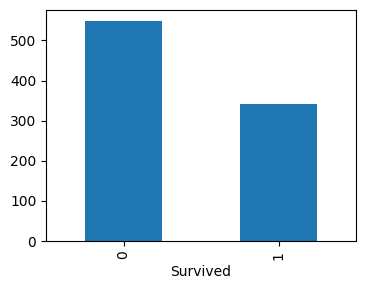

In [146]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
Group_data=titanic_df.groupby('Survived').size()
Group_data.plot(kind='bar', figsize=(4,3))

The target variable's data distribution is sufficient to move forward. There are enough rows for each category to have something to learn from.

### Finging unique values for each column

In [147]:
# recognizing which column is continuous and which is categorical
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
titanic_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

### Results of Basic Data Exploration

Based on the fundamental investigation described above, we may now generate a straightforward report of the data, recording our findings regarding each column. Hence, developing a preliminary analytical roadmap.

A final list will be made after more research has been done on the columns that were chosen in this round.

    PassengerId: Qualitative. Rejected.
    Survived: Categorical. Selected. This is the Target Variable!
    Pclass: Categorical. Selected.
    Name: Qualitative. Rejected. Your name does not save you from dying!!
    Sex: Categorical. Selected.
    Age: Continuous. Selected.
    SibSp: Categorical. Selected.
    Parch: Categorical. Selected.
    Ticket: Qualitative. Rejected.
    Fare: Continuous. Selected.
    Cabin: Qualitative. Rejected. Also, this has too many missing values!
    Embarked: Categorical. Selected

#### deleting pointless data columns

In [148]:
# removing the columns that aren't suitable for predictive analysis because they have qualitative variables
rem_clns = ['PassengerId','Name','Ticket','Cabin']
titanic_df = titanic_df.drop(rem_clns,axis=1)
titanic_df.head(8)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S


### Graphical Analysis

Let's follow a method to visualize in the below mentioned procedure

##### Categorical variables: 
Bar plot

##### Continuous variables: 
Histogram

##### Use bar plots to depict the distribution of all the categorical predictor factors in the data.

Based on the above Basic Data Exploration, we have identified five categorical predictors in the data. Typically, a variable that is categorical contains less than 20 distinct values AND there is recurrence of values, meaning that that the information can be grouped by those unique values.

Categorical Values: 'Pclass', 'Sex', 'SibSp','Parch','Embarked'

To visualize the distribution of the data for these categorical columns, we utilize bar charts.

In [149]:
# Let's plot several bar charts for categorical data at once
# Due to the absence of a default method that may simultaneously plot bar charts for several columns for the same, let us define our own function.

def Bar_Plots(req_data, var_plot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # First, Let us create multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(var_plot), figsize=(20,5))
    fig.suptitle('Visualization of Categorical Variables : '+ str(var_plot))

    for i, plot_no in zip(var_plot, range(len(var_plot))):
        req_data.groupby(i).size().plot(kind='bar',ax=subPlot[plot_no],cmap='magma')

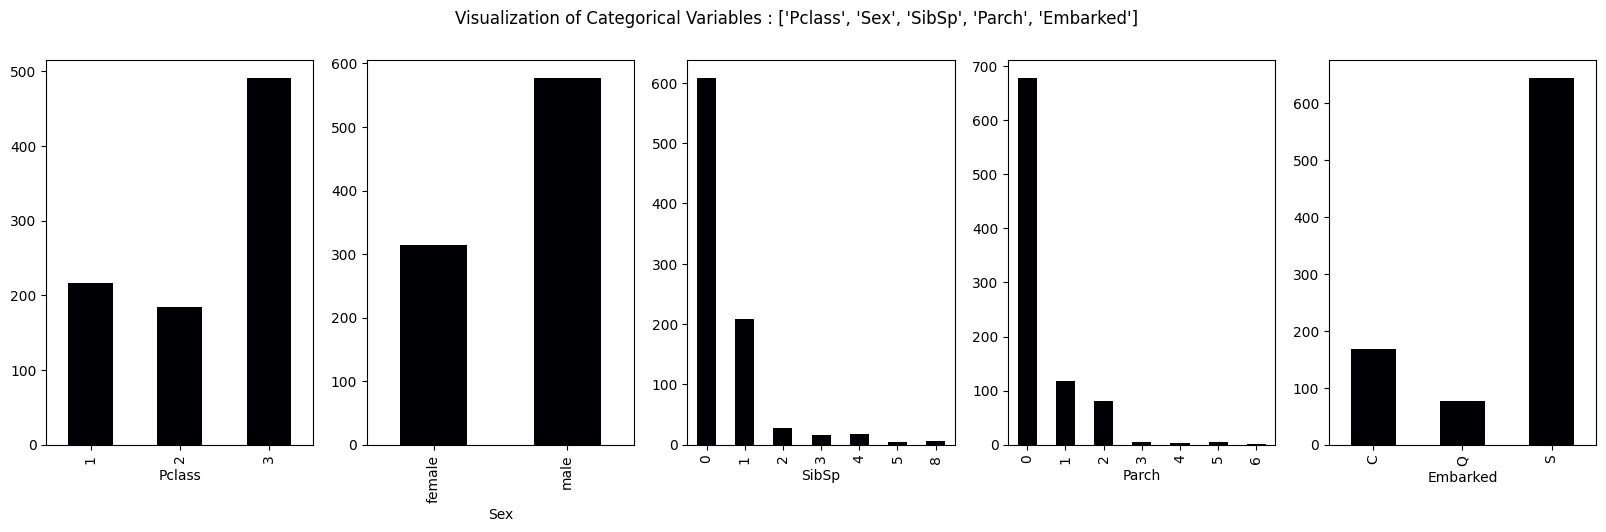

In [150]:
# Let's call the funciton and see the plots
Bar_Plots(req_data=titanic_df, var_plot=['Pclass', 'Sex', 'SibSp','Parch','Embarked'])

These bar graphs display the category names in the X-axis and the frequency of each category on the Y-axis.

Each category in the ideal bar chart has a similar frequency. Therefore, there are enough rows in the data for the ML system to learn for each category.

If a column has an excessively skewed distribution, with just a single dominant bar and relatively few of the other categories present. In machine learning, these kinds of columns could not be very useful. We validate this in the section on correlation analysis before making the final decision on whether to accept or reject the data set.

Except for one, all of the categorical columns in this data have a sufficient distribution to be taken into account for machine learning.

And we need to select all the above catergorical columns for further analysis

### Use histograms to see how the continuous predictor variables are distributed in the data.

Based on the above Data analysis, we  have identified that 'Age',and 'Fare' are the columns as predictors

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

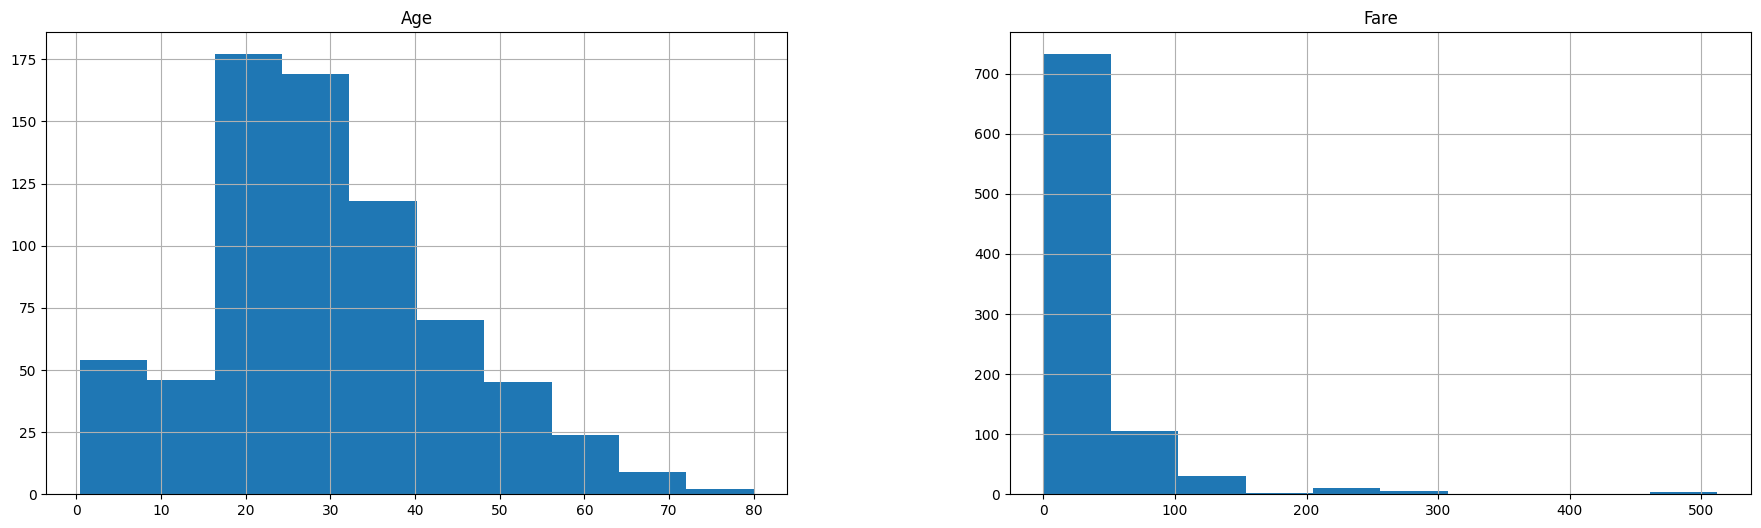

In [151]:
# Plotting histograms of multiple columns together
titanic_df.hist(['Age', 'Fare'], figsize=(22,6))

The data distribution for a single continuous variable is displayed in a histogram.

The range of values is shown on the X-axis, and the number of values in that range is shown on the Y-axis. For instance, there are around 175 rows of data in the "Age" histogram up top that represent people between the ages of 20 and 30.

A bell curve or a slightly skewed bell curve is the desired histogram result. If the skewness is excessive, the column should first undergo outlier treatment before being re-examined. If it does not resolve the issue, the column should then be rejected.

    Age : Selected. The distribution is good.
    Fare: Selected. Outliers seen beyond 300, need to treat them.

### Outlier treatment : for 'Fare'

In [153]:
# Finding nearest values to 300 mark
titanic_df['Fare'][titanic_df['Fare']<300].sort_values(ascending=False)

27     263.000
341    263.000
438    263.000
88     263.000
742    262.375
        ...   
633      0.000
413      0.000
822      0.000
732      0.000
674      0.000
Name: Fare, Length: 888, dtype: float64

from the result we can conclude that the nearest logical value is 263.0, hence, replacing any value above 300 with it.

In [154]:
# Replacing outliers with nearest possibe value
titanic_df['Fare'][titanic_df['Fare']>300] = 263.0

## Analysis After Outlier Treatment

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

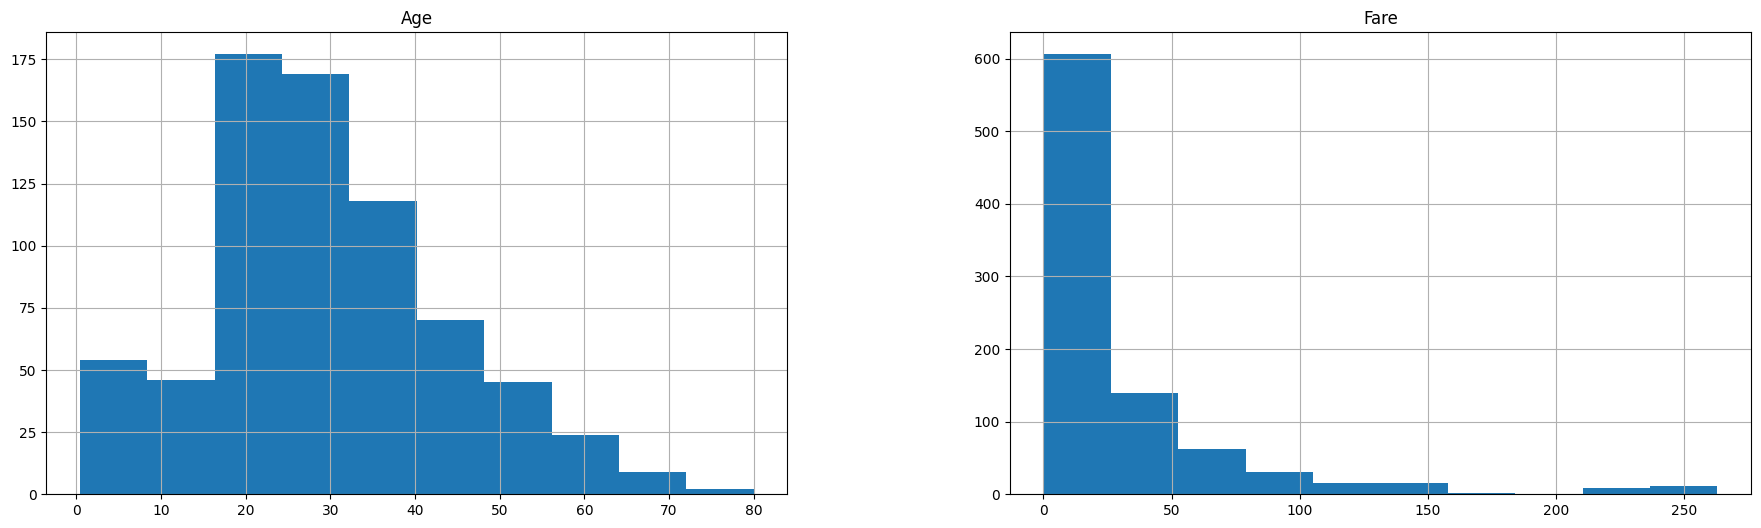

In [155]:
# Plotting histograms of multiple columns together
titanic_df.hist(['Age', 'Fare'], figsize=(22,6))

### Replacing the NULL Values

Each column's missing values are handled differently.

Missing value treatment is not possible when more than 30% of the data in a column is missing. That column has to be rejected since there is too much missing information.

The options for handling missing values in data are listed below.

    Delete the rows with the missing values if there aren't many records.
    For continuous variables, use the median value to impute the missing values.
    For categorical variables, use the MODE value to impute the missing values.
    Use neighboring values to interpolate the values.
    Values should be interpolated using business logic.

In [156]:
# Finding how many missing values are there for each column
titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [157]:
# Replacing missing values of Age with median value
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Replacing missing values of Embarked with Mode value
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

In [158]:
# Checking NULL values presence after the removal/replaces
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Checking the Correlation :
Sincethe data set ahs both continuous and categorical data, we cannot check the feature selction by direct correlation.
so let's use the ANOVA TEST and BOX plots for Visualization

In this case study the Target variable is categorical, hence below two scenarios will be present

`Categorical Target Variable Vs Continuous Predictor

`Categorical Target Variable Vs Categorical Predictor

## Analyzing relationships between categorical and continuous data using box plots

When the variable being predicted is continuous and the variable of interest is categorical, we use bar graphs or boxplots to assess the relationship and an ANOVA test to see how strong the relationship is.

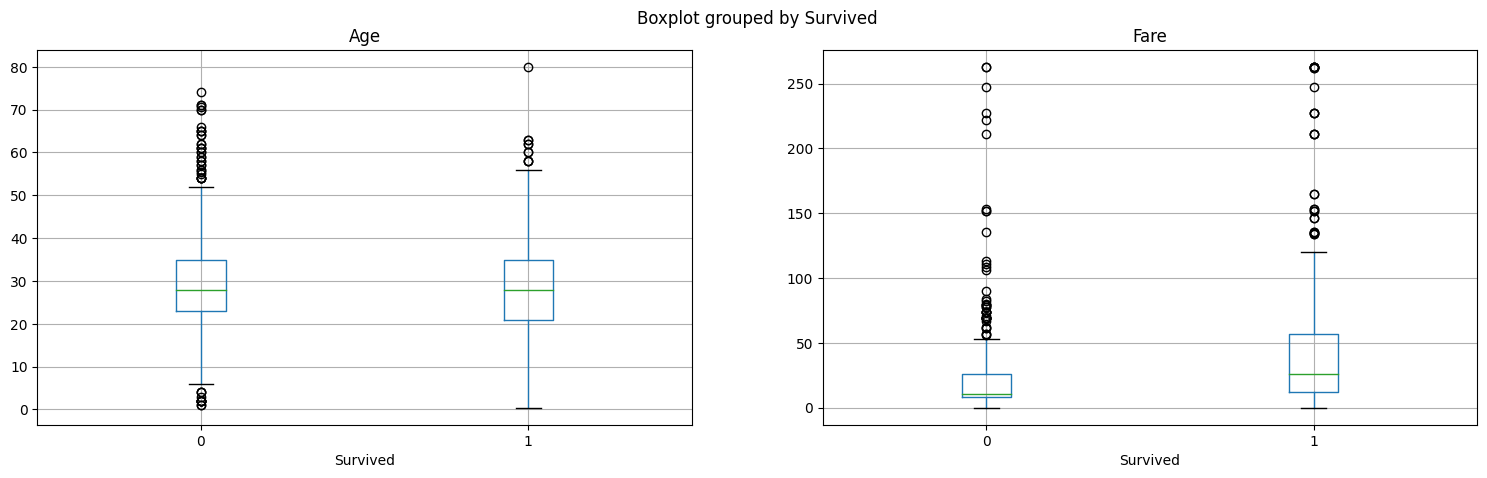

In [159]:
# Relationship between Target Variable and continuous varaibles using BOX Plots
chk_cols=['Age','Fare']

import matplotlib.pyplot as plt
fig, subPlot=plt.subplots(nrows=1, ncols=len(chk_cols), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Survived"
for Predict_Col , i in zip(chk_cols, range(len(chk_cols))):
    titanic_df.boxplot(column=Predict_Col, by='Survived', figsize=(5,5), vert=True, ax=subPlot[i])

These graphs provide insight into the continuous predictor's data distribution on the Y-axis for each category on the X-Axis.


The continuous variable has NO influence on the target variable if the distribution is similar for each category (boxes are in the same line). As a result, there is no correlation between the variables.


For illustration, take a look at the first graph, "Age" Vs. "Survived". The boxes are lined up in a row. It implies that the ages of those who survived the crash and those who did not are comparable. As a result, using Age alone to make a distinction between survival and non-survival is ineffective. This column therefore has no relationship to the Survived.

The opposing features are shown in the other chart. Meaning that for each category of survival, the information's distribution is different (the boxes are not in the same line!). It suggests that these factors may be associated to Survived.

Looking at the ANOVA test results below, we can verify this.

## ANOVA test for Data that is statistical Selection of Features (Categorical vs. Continuous)

    - The average(mean) values of the numerical Predictor variable are the same for all the groups in the categorical Target variable, under the assumption (H0) that there is NO relationship between the provided variables.

    - Results of the ANOVA test: Chances that H0 is true

In [160]:
# Let's define a function that finds the statistical relationship to all the categorical variables
def Fun_ANOVA(Req_data, Target_Element, Regular_Predictor_List):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    Chosen_Predictors=[]
    
    print('##### ANOVA Results ##### \n')
    for i in Regular_Predictor_List:
        ListsOfCategoryGroups=Req_data.groupby(Target_Element)[i].apply(list)
        AnovaResults = f_oneway(*ListsOfCategoryGroups)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(i, 'is correlated with', Target_Element, '| P-Value:', AnovaResults[1])
            Chosen_Predictors.append(i)
        else:
            print(i, 'is NOT correlated with', Target_Element, '| P-Value:', AnovaResults[1])
    
    return(Chosen_Predictors)

In [161]:
# Calling the function to check which categorical variables are correlated with target
Regular_Variables=['Age','Fare']
Fun_ANOVA(Req_data=titanic_df, Target_Element='Survived', Regular_Predictor_List=Regular_Variables)

##### ANOVA Results ##### 

Age is NOT correlated with Survived | P-Value: 0.052760688475835
Fare is correlated with Survived | P-Value: 1.8421954983111479e-16


['Fare']

The ANOVA results support our visual analysis presented above using box plots.

Look at the P-Value of Age; it was narrowly rejected! In such cases, you can choose to include the boundary-line variable and see whether that improves the accuracy.

#### Fare is Finally selected as Continuous Variable

## BiVariant Analysis Using Bar Plots

When both the target variable and the predictor are categorical, we visually examine their correlation using barplots and statistically, using the Chi-square test.

In [162]:
# Cross tablulation between two categorical variables
rel_df=pd.crosstab(index=titanic_df['Sex'], columns=titanic_df['Survived'])
rel_df

Survived,0,1
Sex,,
female,81,233
male,468,109


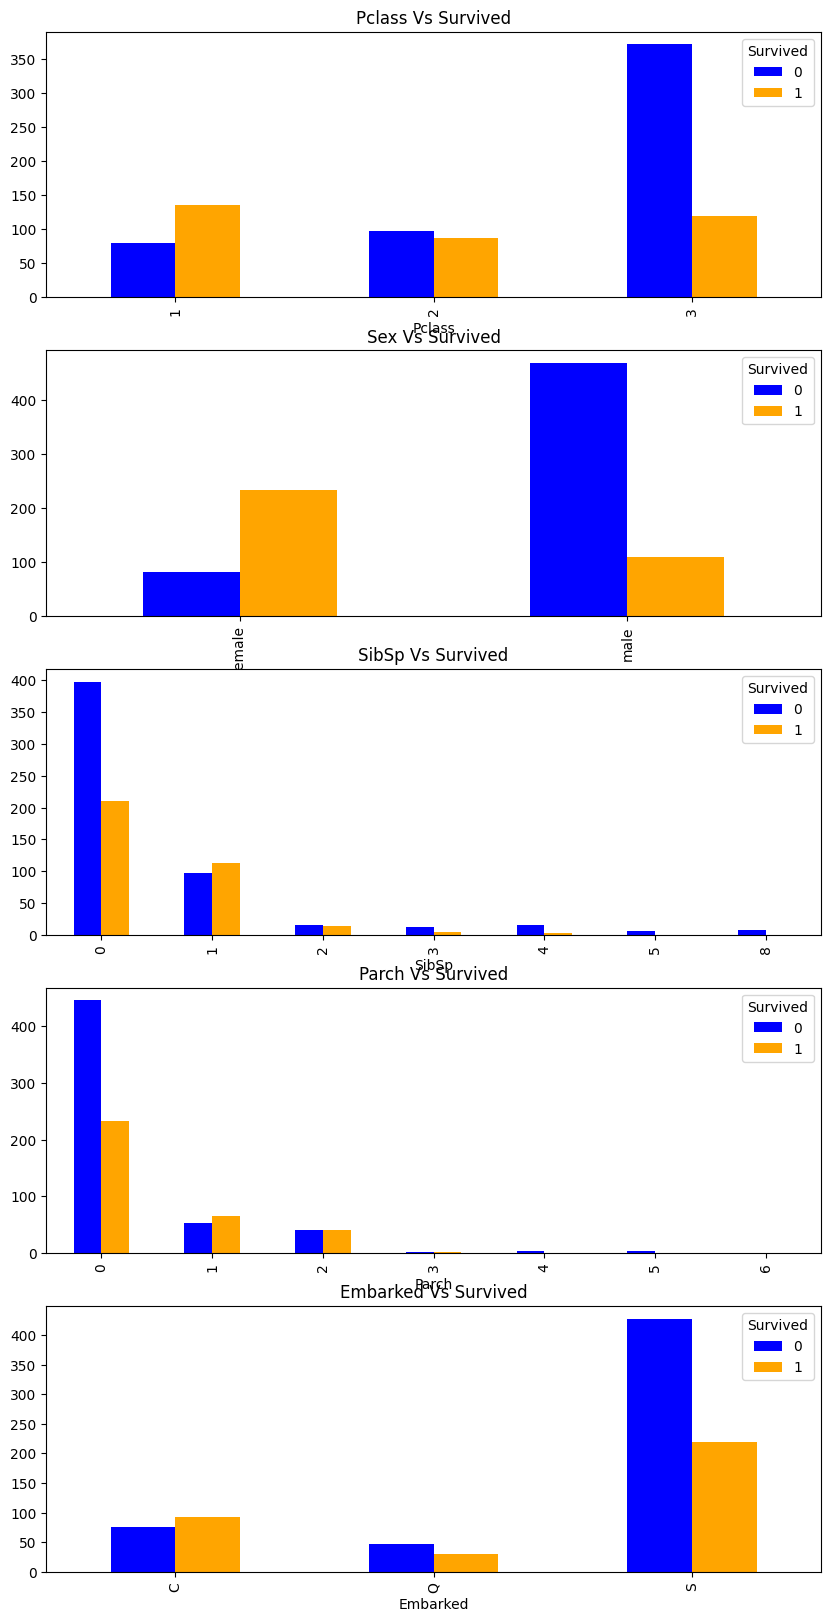

In [163]:
# Using grouped bar charts for visual inference
Categorical=['Pclass', 'Sex', 'SibSp','Parch','Embarked']

import matplotlib.pyplot as plt
fig, subPlot=plt.subplots(nrows=len(Categorical), ncols=1, figsize=(10,20))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Survived"
for column , i in zip(Categorical, range(len(Categorical))):
    rel_df=pd.crosstab(index=titanic_df[column], columns=titanic_df['Survived'])
    rel_df.plot.bar(color=['blue','orange'], ax=subPlot[i], title=column+' Vs '+'Survived')

These grouped bar graphs display the category and frequency along the X-Axis. The two columns are not connected if the ratio of bars is the same for all categories.

However, take a peek at the Sex vs. Survived storyline. Because the bars differ for each category, two columns are related to one another.

Using Chi-Square Tests, we validate this study in the part that follows. 

## Selection of Statistical Features by applying the Chi-Square Test

To determine the relationship between two categorical variables, the Chi-Square test is used.

    The two columns are not connected, according to assumption (H0).
    Chi-Sq test result: The likelihood that H0 is true.

In [164]:
# the creation of a function to determine the relationship between each categorical variable and the target variable
def FunctionChisq(req_data, Target_Element, Cat_Var_List):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    Sel_Pred=[]

    for i in Cat_Var_List:
        rel_df=pd.crosstab(index=req_data[Target_Element], columns=req_data[i])
        ChiSqResult = chi2_contingency(rel_df)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(i, 'is correlated with', Target_Element, '| P-Value:', ChiSqResult[1])
            Sel_Pred.append(i)
        else:
            print(i, 'is NOT correlated with', Target_Element, '| P-Value:', ChiSqResult[1])        
            
    return(Sel_Pred)

In [165]:
Cat_Var=['Pclass', 'Sex', 'SibSp','Parch','Embarked']

# Calling the function
FunctionChisq(req_data=titanic_df, 
              Target_Element='Survived',
              Cat_Var_List= Cat_Var)

Pclass is correlated with Survived | P-Value: 4.549251711298793e-23
Sex is correlated with Survived | P-Value: 1.1973570627755645e-58
SibSp is correlated with Survived | P-Value: 1.5585810465902116e-06
Parch is correlated with Survived | P-Value: 9.703526421039997e-05
Embarked is correlated with Survived | P-Value: 2.3008626481449577e-06


['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

#### Finally 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked' are selected as Categorical Variables

## Final Predictors Selection for Implementing Machine Learning

Choosing the final columns for machine learning based on the tests above

I'm choosing the "education_num" column in place of the original "education" column. This depicts the data's ordinal characteristic.

In [166]:
Sel_Cols=['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked','Fare']

# Selecting final columns
Info_ML=titanic_df[Sel_Cols]
Info_ML.head(8)

,Pclass,Sex,SibSp,Parch,Embarked,Fare
0,3,male,1,0,S,7.2500
1,1,female,1,0,C,71.2833
2,3,female,0,0,S,7.9250
3,1,female,1,0,S,53.1000
4,3,male,0,0,S,8.0500
5,3,male,0,0,Q,8.4583
6,1,male,0,0,S,51.8625
7,3,male,3,1,S,21.0750


In [167]:
# preserving this last set of information for implementation reference
Info_ML.to_pickle('Info_ML.pkl')

## Preparing Data for Machine Learnin

A list of actions taken before data can be used for machine learning on predictor variables

    1) Each ordinal categorical column is changed to a number
    2) 1/0 mapping is used to transform binary nominal categorical columns to numbers.
    3) utilizing pd to change all other nominal category columns to numeric.get_dummies()
    4) Standardization, normalization, logarithms, and sqrt are optional data transformations. Important if you're utilizing neural networks or distance-based techniques like KNN

There is no ordinal categorical variable in the data.

### using 1/0 mapping to translate the binary nominal variable to a numeric form

In [168]:
# binary to numeric conversion of the nominal binary variable sex
Info_ML['Sex'].replace({'female':0, 'male':1}, inplace=True)

### Using get_dummies() to transform the nominal variable to a numeric value

In [169]:
# utilizing dummy variables to treat all nominal variables concurrently
Info_ML_Numeric=pd.get_dummies(Info_ML)

# for further analysis adding the Target Variable to the data 
Info_ML_Numeric['Survived']=titanic_df['Survived']

# Printing sample First 8 rows
Info_ML_Numeric.head(8)

,Pclass,Sex,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,1,1,0,7.2500,0,0,1,0
1,1,0,1,0,71.2833,1,0,0,1
2,3,0,0,0,7.9250,0,0,1,1
3,1,0,1,0,53.1000,0,0,1,1
4,3,1,0,0,8.0500,0,0,1,0
5,3,1,0,0,8.4583,0,1,0,0
6,1,1,0,0,51.8625,0,0,1,0
7,3,1,3,1,21.0750,0,0,1,0


## Dividing the data into Training and Test samples for Machine Learning

For building the model, we don't use all of the data. Randomly chosen data are set aside to test the effectiveness of the model. The remaining data, on which the model is formed, is referred to as training data, and this is known as testing data. Usually, 70% of the data is utilized for training, while the remaining 30% is used for testing.

In [170]:
# generating a printout of each column's names for our reference 
Info_ML_Numeric.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Survived'],
      dtype='object')

In [171]:
# Maintain the Predictor Variable and the Target Variable independents
Target_Element='Survived'
Pred=['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q','Embarked_S']

X=Info_ML_Numeric[Pred].values
y=Info_ML_Numeric[Target_Element].values

# Create training and test sets from the data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

### Standardization/Normalization of data

If you wish to compare the accuracy of the transformed data with the accuracy of the raw data, you can opt not to conduct this step.

This step becomes required if you are utilizing KNN or neural networks, though.

In [172]:
### Data standardization ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Select either normalization or standardization.
# Min Max Normalization generated superior results on these data.

# Select between Min Max normalization and standardization.
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# preserving the appropriate item for future use
PredictorScalerFit=PredictorScaler.fit(X)

# producing X's standardized values
X=PredictorScalerFit.transform(X)

# Data should be divided into training and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [173]:
# Validation of the sampled data's sanity
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(623, 8)
(623,)
(268, 8)
(268,)


## Logistic Regression

In [174]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# select either C=1 or Penalty='l1'
# 'Newton-cg', 'lbfgs', 'liblinear','sag', and'saga' solvers can all be given different values.
clf = LogisticRegression(C=5,penalty='l2', solver='newton-cg')

# Model construction using training data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Accuracy measurement for Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

#Printing the model's overall accuracy
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Operating 10-Fold Cross checking a certain algorithm
# passing whole data X and Y because the K-fold will divide the data and decide train/test on its own
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nValues for 10-fold Cross Validation Accuracy:\n',Accuracy_Values)
print('\nThe models final average accuracy:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       157
           1       0.73      0.73      0.73       111

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

[[127  30]
 [ 30  81]]
Accuracy of the model on Testing Sample Data: 0.78

Values for 10-fold Cross Validation Accuracy:
 [0.77649393 0.77641044 0.77021909 0.82182649 0.78803431 0.75981111
 0.78268624 0.75756502 0.79649424 0.78302904]

The models final average accuracy: 0.78


### Decision Trees Classifier

DecisionTreeClassifier(criterion='entropy', max_depth=3)
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.83      0.68      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268

[[141  16]
 [ 35  76]]
Accuracy of the model on Testing Sample Data: 0.81

Values for 10-fold Cross Validation Accuracy:
 [0.80938963 0.81776069 0.76791722 0.83190886 0.82022472 0.78065407
 0.7911255  0.77562138 0.82683216 0.79359477]

The models final average accuracy: 0.8


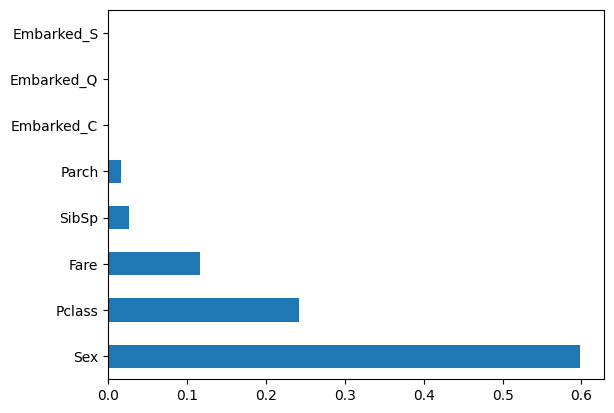

In [176]:
#Decision Trees
from sklearn import tree
#select from a variety of customizable hyper parameters.
clf = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')

# printing every setting for decision trees
print(clf)

# Model construction using training data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Accuracy measurement for Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the model's overall accuracy
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# The Top 10 Most Important Columns' Feature Importance is Plotted
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Pred)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Operating 10-Fold Cross checking a certain algorithm
# passing whole data X and Y because the K-fold will divide the data and decide train/test on its own
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nValues for 10-fold Cross Validation Accuracy:\n',Accuracy_Values)
print('\nThe models final average accuracy:', round(Accuracy_Values.mean(),2))

### Random Forest Classifier

RandomForestClassifier(max_depth=4, n_estimators=200)
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       157
           1       0.80      0.66      0.72       111

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268

[[139  18]
 [ 38  73]]
Accuracy of the model on Testing Sample Data: 0.79

Values for 10-fold Cross Validation Accuracy:
 [0.80431954 0.75497104 0.76225561 0.85250075 0.88610043 0.81433378
 0.78874467 0.71832623 0.81221749 0.80001088]

The models final average accuracy: 0.8


<Axes: >

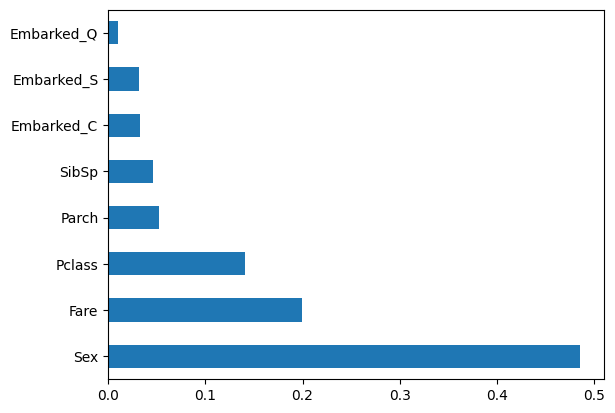

In [177]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
# To fine-tune the model, experiment with alternative hyperparameter values for max_depth, n_estimators, and criteria.
clf = RandomForestClassifier(max_depth=4, n_estimators=200,criterion='gini')

# printing all of the Random Forest's settings
print(clf)

# Model construction using training data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Accuracy measurement for Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the model's overall accuracy
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Operating 10-Fold Cross checking a certain algorithm
# passing whole data X and Y because the K-fold will divide the data and decide train/test on its own
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nValues for 10-fold Cross Validation Accuracy:\n',Accuracy_Values)
print('\nThe models final average accuracy:', round(Accuracy_Values.mean(),2))


#Ranking the relevance of the features for the Top 10 Most Important Columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Pred)
feature_importances.nlargest(10).plot(kind='barh')

### AdaBoost

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.1, n_estimators=100)
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       157
           1       0.77      0.68      0.72       111

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268

[[134  23]
 [ 36  75]]
Accuracy of the model on Testing Sample Data: 0.78

Values for 5-fold Cross Validation Accuracy:
 [0.74301676 0.79118868 0.85250075 0.77543262 0.82508968]

The models final average accuracy: 0.8


<Axes: >

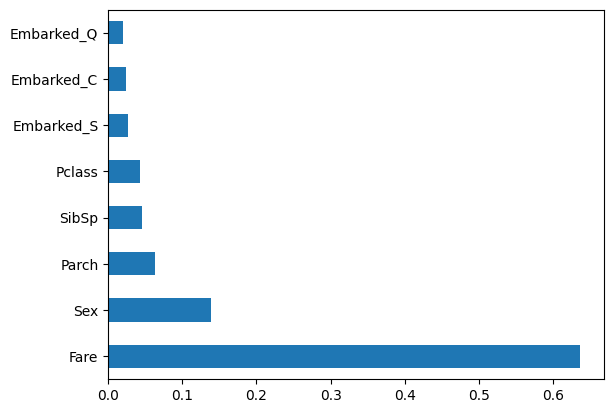

In [178]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=3)
clf = AdaBoostClassifier(n_estimators=100, base_estimator=DTC ,learning_rate=0.1)

# Printing all the parameters of Adaboost
print(clf)

# Model construction using training data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Accuracy measurement for Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the model's overall accuracy
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Operating 5-Fold Cross checking a certain algorithm
# passing whole data X and Y because the K-fold will divide the data and decide train/test on its own
Accuracy_Values=cross_val_score(AB, X , y, cv=5, scoring='f1_weighted')
print('\nValues for 5-fold Cross Validation Accuracy:\n',Accuracy_Values)
print('\nThe models final average accuracy:', round(Accuracy_Values.mean(),2))

#Ranking the relevance of the features for the Top 10 Most Important Columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Pred)
feature_importances.nlargest(10).plot(kind='barh')

### XGBoost

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       157
           1       0.79      0.68      0.73       111

    accuracy                           0.79       268
   macro avg       0.79      0

<Axes: >

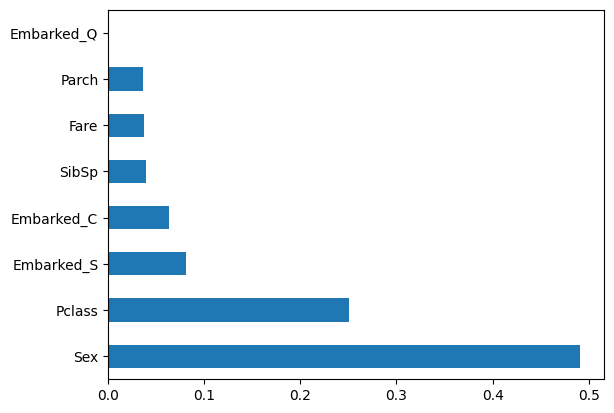

In [179]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=2, learning_rate=0.1, n_estimators=200, objective='binary:logistic', booster='gbtree')

# Printing all the parameters of XGBoost
print(clf)

# Model construction using training data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Accuracy measurement for Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the model's overall accuracy
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Operating 5-Fold Cross checking a certain algorithm
# passing whole data X and Y because the K-fold will divide the data and decide train/test on its own
Accuracy_Values=cross_val_score(XGB, X , y, cv=5, scoring='f1_weighted')
print('\nValues for 5-fold Cross Validation Accuracy:\n',Accuracy_Values)
print('\nThe models final average accuracy:', round(Accuracy_Values.mean(),2))

#Ranking the relevance of the features for the Top 10 Most Important Columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Pred)
feature_importances.nlargest(10).plot(kind='barh')

### KNN

In [180]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=4)

# Printing all the parameters of KNN
print(clf)

# Model construction using training data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Accuracy measurement for Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the model's overall accuracy
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Operating 5-Fold Cross checking a certain algorithm
# passing whole data X and Y because the K-fold will divide the data and decide train/test on its own
Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')
print('\nValues for 10-fold Cross Validation Accuracy:\n',Accuracy_Values)
print('\nThe models final average accuracy:', round(Accuracy_Values.mean(),2))


# In KNN, there is no built-in way to determine the relevance of a feature.

KNeighborsClassifier(n_neighbors=4)
              precision    recall  f1-score   support

           0       0.75      0.92      0.83       157
           1       0.83      0.58      0.68       111

    accuracy                           0.78       268
   macro avg       0.79      0.75      0.75       268
weighted avg       0.79      0.78      0.77       268

[[144  13]
 [ 47  64]]
Accuracy of the model on Testing Sample Data: 0.77

Values for 10-fold Cross Validation Accuracy:
 [0.77097382 0.77562138 0.73163495 0.84348731 0.88395861 0.75981111
 0.81221749 0.74470894 0.8284365  0.81061604]

The models final average accuracy: 0.8


### Support Vector Machine

In [181]:
# Implementation of Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(C=10, kernel='rbf', gamma=0.01)

# Printing all the parameters of KNN
print(clf)

# Model construction using training data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Accuracy measurement for Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the model's overall accuracy
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Operating 5-Fold Cross checking a certain algorithm
# passing whole data X and Y because the K-fold will divide the data and decide train/test on its own
Accuracy_Values=cross_val_score(SVM, X , y, cv=5, scoring='f1_weighted')
print('\nValues for 5-fold Cross Validation Accuracy:\n',Accuracy_Values)
print('\nThe models final average accuracy:', round(Accuracy_Values.mean(),2))

# The Top 10 Most Important Columns' Feature Importance is Plotted
# SVM.coef_, a built-in attribute, only functions with linear kernels.

SVC(C=10, gamma=0.01)
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       157
           1       0.77      0.70      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

[[134  23]
 [ 33  78]]
Accuracy of the model on Testing Sample Data: 0.79

Values for 5-fold Cross Validation Accuracy:
 [0.80419804 0.80247578 0.78518836 0.747241   0.7837266 ]

The models final average accuracy: 0.78


### Naive Bayes

In [182]:
# Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# Binomial Classification uses the GaussianNB algorithm.
# Multi-class classification use multinomial NB.
clf = GaussianNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Accuracy measurement for Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the model's overall accuracy
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Operating 5-Fold Cross checking a certain algorithm
# passing whole data X and Y because the K-fold will divide the data and decide train/test on its own
Accuracy_Values=cross_val_score(NB, X , y, cv=5, scoring='f1_weighted')
print('\nValues for 5-fold Cross Validation Accuracy:\n',Accuracy_Values)
print('\nThe models final average accuracy:', round(Accuracy_Values.mean(),2))

GaussianNB()
              precision    recall  f1-score   support

           0       0.84      0.74      0.79       157
           1       0.68      0.80      0.74       111

    accuracy                           0.76       268
   macro avg       0.76      0.77      0.76       268
weighted avg       0.78      0.76      0.77       268

[[116  41]
 [ 22  89]]
Accuracy of the model on Testing Sample Data: 0.77

Values for 5-fold Cross Validation Accuracy:
 [0.69940027 0.77106857 0.78223596 0.79775281 0.8025206 ]

The models final average accuracy: 0.77


## Model Deployment

We choose the method that gives the best average accuracy based on the aforementioned tests. In this instance, other algorithms have generated similar average accuracy results. So, we are free to select any one of them.

Since Decision Trees can process this data quite quickly, I've decided to use them as my final model.

The steps below are used to deploy the model.

    1) Train the model using all of the given data.
    2) The model should be saved as a serialized file that can be kept everywhere.
    3) Create a Python function that is integrated with the front end (such as Tableau, a Java website, etc.) and returns the forecast.

## selecting only the most crucial factors

When using the model in production, it is advantageous to use fewer predictors. The model will be less reliant and therefore more stable if you keep fewer predictors.

This is crucial, especially when there are a lot of predictor columns in the data.

The most significant predictor factors in this data are age, education_number, hours_per_week, capital_gain, capital.loss, workclass, and marital_status. Because they constantly rank first on the list of variables for each algorithm. Consequently, this final set of predictor variables was chosen.

In [183]:
# Separate Target Variable and Predictor Variables
Target_Element='Survived'

#Based on the variable importance charts of several algorithms, the deployment's final set of predictors are chosen.
Predictors=['Fare', 'Sex', 'Parch', 'Pclass']

X=Info_ML_Numeric[Pred].values
y=Info_ML_Numeric[Target_Element].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Select either normalization or standardization.
# Min Max Normalization generated superior outcomes for this data.

# Select either normalization or standardization.
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Keeping the appropriate item on hand for future use
PredictorScalerFit=PredictorScaler.fit(X)

# Producing X's standardized values
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(891, 8)
(891,)


### Step 1: Retrain the model using all available data.

In [184]:
#Decision Trees
from sklearn import tree

#select from a variety of customizable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')

# Train the model using all available data.
FinalDecisionTreeModel=clf.fit(X,y)

#### comparing the accuracy of the final model with fewer predictors

In [185]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Operating 5-Fold Cross checking a certain algorithm
# passing whole data X and Y because the K-fold will divide the data and decide train/test on its own
Accuracy_Values=cross_val_score(FinalDecisionTreeModel, X , y, cv=5, scoring='f1_weighted')
print('\nValues for 5-fold Cross Validation Accuracy:\n',Accuracy_Values)
print('\nThe models final average accuracy:', round(Accuracy_Values.mean(),2))


Values for 5-fold Cross Validation Accuracy:
 [0.81355939 0.80106761 0.80106761 0.78351931 0.81018299]

The models final average accuracy: 0.8


### Step 2. Save the model as a serialized file which can be stored anywhere

In [186]:
import pickle
import os

# Pickle library can be used to serialize Python objects for saving.
# Now let's save the final version.
with open('FinalDecisionTreeModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalDecisionTreeModel, fileWriteStream)
    # Remember to shut down the filestream!
    fileWriteStream.close()
    
print('The pickle file for the predictive model is located at:',os.getcwd())

The pickle file for the predictive model is located at: C:\Users\Vipinchi Nidhi\Downloads\Python


### Step 3. Create a python function

In [187]:
# Any front-end tool or website can call this function.
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    # Ensuring that the input data contains the same columns as the data used to train the model.
    # Additionally, if standardization/normalization was performed, fresh input must follow suit.
    
    # Joining the training data and new data
    Info_ML=pd.read_pickle('Info_ML.pkl')
    InputData=InputData.append(Info_ML)
    
    # Numerical conversion of the binary nominal variable sex
    InputData['Sex'].replace({'female':0, 'male':1}, inplace=True)
    
    
    # producing dummy variables for the remaining nominal variables.
    InputData=pd.get_dummies(InputData)
            
    # Preserving the same arrangement of columns as during model training
    Predictors=['Fare', 'Sex', 'Parch', 'Pclass']
    
    # Producing the model's input values
    X=InputData[Predictors].values[0:Num_Inputs]
    
    # Producing the standardized values of X because it was done during model training as well.
    X=PredictorScalerFit.transform(X)
    
    # Using the pickle file to load the function
    import pickle
    with open('FinalDecisionTreeModel.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Prediction-making
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Predicted Status'])
    return(PredictionResult)

In [188]:
# Using the function when some loan applications are submitted
sample_data_for_Prediction=pd.DataFrame(
data=[[71,'female',0, 1],
     [50,'male',0, 3]],
columns=['Fare', 'Sex', 'Parch', 'Pclass'])

print(sample_data_for_Prediction)

# Invoking the Function for Prediction
Func_Pred_Result(req_data= sample_data_for_Prediction)

   Fare     Sex  Parch  Pclass
0    71  female      0       1
1    50    male      0       3


ValueError: X has 4 features, but MinMaxScaler is expecting 8 features as input.